In [1]:
include("simple_sn.jl")
using Main.SNetwork

In [2]:
using Statistics, PyPlot

In [3]:
using MLDatasets

Load train & test data

In [4]:
(train_x, train_y) =  MNIST.traindata()
train_xf = collect(MNIST.convert2features(train_x)')
train_yc = to_categorical(train_y);

In [5]:
(test_x, test_y) =  MNIST.testdata()
test_xf = collect(MNIST.convert2features(test_x)')
test_yc = to_categorical(test_y);

In [6]:
n_inputs = size(test_xf,2)
n_hidden = 500
n_output = size(test_yc,2)

10

In [7]:
shape = [n_inputs, n_hidden, n_output]

3-element Array{Int64,1}:
 784
 500
  10

In [8]:
network = Network(shape, 0.0, 1.0, 5)

Network(Dict(4 => [0; 0; … ; 0; 0],2 => [0; 0; … ; 0; 0],3 => [0; 0; … ; 0; 0],1 => [0; 0; … ; 0; 0]), Dict(2 => [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0],3 => [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0],1 => [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]), Dict{Int64,Array{#s1,2} where #s1<:Real}(2 => [0.0; 0.0; … ; 0.0; 0.0],3 => [0.0; 0.0; … ; 0.0; 0.0],1 => [-1.0; -1.0; … ; -1.0; -1.0]), Dict{Tuple{Int64,Int64},Array{#s2,2} where #s2<:Real}((1, 2) => [0.8355495624984733 0.30064258901557084 … 0.19948227517988518 -2.441821214126121; -1.6449511786169062 0.7406167993012033 … 0.8716811624329476 -1.1979113507500458; … ; 0.5334927063349664 1.6427183628843909 … -0.8817403106636938 1.0418319221477121; -0.6191981659297267 -0.8495910531535572 … -0.18402863713402878 -0.8033030020882973],(2, 3) => [1.6134990692376876 -0.4310205767407506 … -0.03996224086659177 0.7974057685203397; -1.532181066766986 0.42218683291251935 … -1.019775986328751 -1.2966158399781733; … ; 0.5640487168610964

In [9]:
network.thresholds[2] = 0.9
network.thresholds[3] = 0.025 * n_hidden

12.5

In [10]:
network.learn_rate

0.0005

In [11]:
err = @time train_batch(network, train_xf, train_yc, 50, 1000, 50)

3075.277162 seconds (212.95 M allocations: 3.690 TiB, 3.19% gc time)


1000-element Array{Float64,1}:
 22.85737932849929   
  8.63596601455663   
  4.101277588800911  
  2.0501285638345785 
  2.8898878912385073 
  3.2805200721796894 
  2.2175067194933167 
  2.0555167067795437 
  1.1777958956658963 
  2.7974487712254796 
  2.15179742214326   
  1.5859897942027448 
  2.1520455528588234 
  ⋮                  
  0.0887595843108781 
  0.1073312967039016 
  0.06117266665391169
  0.07076185758878138
  0.15441834988532432
  0.08512512630323496
  0.0765299331857132 
  0.1530383870248028 
  0.1605750138989481 
  0.2758937823140174 
  0.06012237838943748
  0.12065782100558209

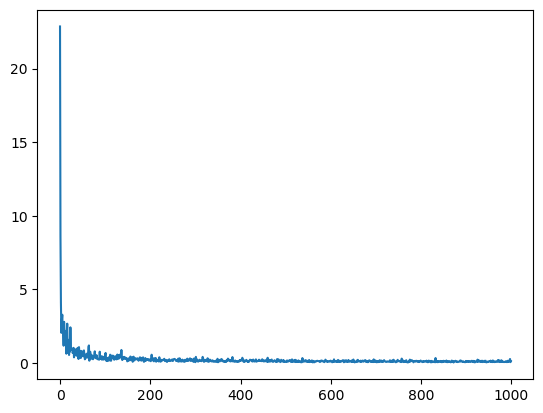

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb843a1a630>

In [12]:
plot(err)

In [13]:
accuracy(network, test_xf, test_yc, 50)

0.908

In [14]:
w1 = deepcopy(network.connections)

Dict{Tuple{Int64,Int64},Array{#s2,2} where #s2<:Real} with 2 entries:
  (1, 2) => [0.83555 0.300643 … 0.199482 -2.44182; -1.64495 0.740617 … 0.871681…
  (2, 3) => [1.084 -0.772521 … -0.0954622 0.0314058; -1.45318 0.316687 … -1.124…

In [11]:
err2 = @time train_batch(network, train_xf, train_yc, 50, 1000, 50)

3075.277162 seconds (212.95 M allocations: 3.690 TiB, 3.19% gc time)


1000-element Array{Float64,1}:
 22.85737932849929   
  8.63596601455663   
  4.101277588800911  
  2.0501285638345785 
  2.8898878912385073 
  3.2805200721796894 
  2.2175067194933167 
  2.0555167067795437 
  1.1777958956658963 
  2.7974487712254796 
  2.15179742214326   
  1.5859897942027448 
  2.1520455528588234 
  ⋮                  
  0.0887595843108781 
  0.1073312967039016 
  0.06117266665391169
  0.07076185758878138
  0.15441834988532432
  0.08512512630323496
  0.0765299331857132 
  0.1530383870248028 
  0.1605750138989481 
  0.2758937823140174 
  0.06012237838943748
  0.12065782100558209